[ 0  1  2  3  4  5  6  7  8  9 10]
[None 1 0.5 0.3333333333333333 0.25 0.2 0.16666666666666666
 0.14285714285714285 0.125 0.1111111111111111 0.1]


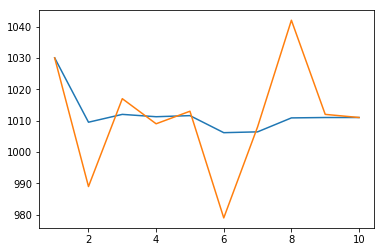

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# A, Z, K, prior_estimate_x, estimate_x = None, None, None, None, None

'''
用于评估黄金的重量
Z = [1030 989 1017 1009 1013 979 1008 1042 1012 1011]
K = 1/n
initial guess 1000
'''

Z = np.array([None, 1030, 989, 1017, 1009, 1013, 979, 1008, 1042, 1012, 1011])
A = 1
K = np.array([None, 1, 1 / 2, 1 / 3, 1 / 4, 1 / 5, 1 / 6, 1 / 7, 1 / 8, 1 / 9, 1 / 10])
T = np.arange(0, 11)

estimate_x = np.zeros(11)
prior_estimate_x = np.zeros(11)

estimate_x[0] = 1000

print(T)
print(K)
# 输入一个z
for t in T[1:]:
    # 预测
    prior_estimate_x[t] = estimate_x[t - 1] * A
    # 更新
    estimate_x[t] = prior_estimate_x[t] + K[t] * (Z[t] - prior_estimate_x[t])

plt.figure()

plt.plot(T[1:], estimate_x[1:])
plt.plot(T[1:], Z[1:])

In [ ]:
'''
Now, it is time to examine a dynamic system that changes its state over the time. In this example, 
we are going to track the constant velocity aircraft in one dimension using the α-β filter.

α=0.2
β=0.1

The initial conditions for the time n=0 are given:

x^0,0=30000m
x˙^0,0=40m/s



'''
a = 0.2
b = 0.1
dt = 5

Z = np.array([None, 30110, 30265, 30740, 30750, 31135, 31015, 31180, 31610, 31960, 31865])

estimate_x = np.zeros((2, 11))
prior_estimate_x = np.zeros((2, 11))
A = np.array([[1, 5], [0, 1]])

estimate_x[:, 0] = [30000, 40]
T = np.arange(0, 11)
print(T)
# estimate_x
for t in T[1:]:
    # 预测
    prior_estimate_x[:, t] = np.dot(A, estimate_x[:, t - 1])
    # 更新
    # a = np.dot(np.array([[1, -a], [-b / dt, 1]]), prior_estimate_x[:, t])
    # print(a)
    estimate_x[:, t] = np.dot(np.array([[1 - a, 0], [-b / dt, 1]]), prior_estimate_x[:, t]) + [a * Z[t], b * Z[t] / dt]

plt.figure()
plt.plot(T[1:], estimate_x[0, 1:],label='estimate')
plt.plot(T[1:],Z[1:],label='measurement')
plt.legend(loc='best')

![jupyter](./kn.png)


![jupyter](./kn2.png)

![jupyter](./pn.png)

In [ ]:
'''
至此我们有了两个公式, 
The state update equations.
The dynamic model equations.

然后我们引入 estimate error 和 measurement error
第三个公式是
 Kalman Gain Equation
 第四个公式是
 Covariance Update Equation
 
 第五个公式是, covariance的预测变化公式
 Covariance Extrapolation Equation
 在第一个例子中, 系统的dynamic models 是不变的, pn+1 = p
'''


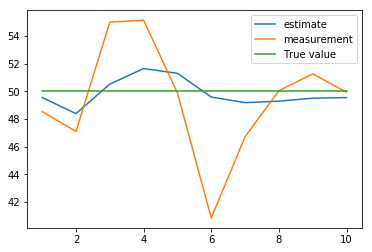

In [30]:
# building height
'''
The true building height is 50 meters.
The altimeter measurement error (standard deviation) is 5 meters.
The set of ten measurements is: 48.54m, 47.11m, 55.01m, 55.15m, 49.89m, 40.85m, 46.72m, 50.05m, 51.27m, 49.95m.
'''
estimate_x = np.zeros(11)
prior_estimate_x = np.zeros(11)
estimate_x[0] = 60
True_value = np.array([None, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50])
P = np.zeros(11)
K = np.zeros(11)
Z = np.array([None, 48.54, 47.11, 55.01, 55.15, 49.89, 40.85, 46.72, 50.05, 51.27, 49.95])
P[0] = 255
T = np.arange(0, 11)
R = np.array([25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25])
for t in T[1:]:
    prior_estimate_x[t] = estimate_x[t - 1]
    P[t] = P[t - 1]
    
    K[t] = P[t] / (P[t] + R[t])
    
    estimate_x[t] = prior_estimate_x[t] + K[t] * (Z[t] - prior_estimate_x[t])
    P[t] = (1 - K[t]) * P[t]

plt.figure()
plt.plot(T[1:], estimate_x[1:], label='estimate')
plt.plot(T[1:], Z[1:], label='measurement')
plt.plot(T[1:], True_value[1:], label='True value')
plt.legend()

In [ ]:
# 我们评估房子的高度的时候, 过程噪声为0 , 因为房子的高度不会变化. 系统的噪声为 q
'''
The Covariance Extrapolation Equation shall include the Process Noise Variance.
'''
# We would like to estimate the temperature of the liquid in a tank.
